## 1. **Basic Linear Regression**
- **Objective:** Predict a continuous value based on input features.
- **Overview:** Linear regression is one of the simplest forms of machine learning, where you fit a line to a set of data points. The goal is to find the best-fitting straight line through the data points that minimizes the sum of the squared differences between the observed and predicted values.
- **Steps:**
	1. Generate or collect a small dataset (e.g., predicting house prices based on size).
	2. Implement the least squares method to compute the best-fit line.
	3. Evaluate the model using mean squared error (MSE).

Slope: 0.8, Intercept: 0.39999999999999947, Predicted Y: [1.2 2.  3.6 2.8 4.4]


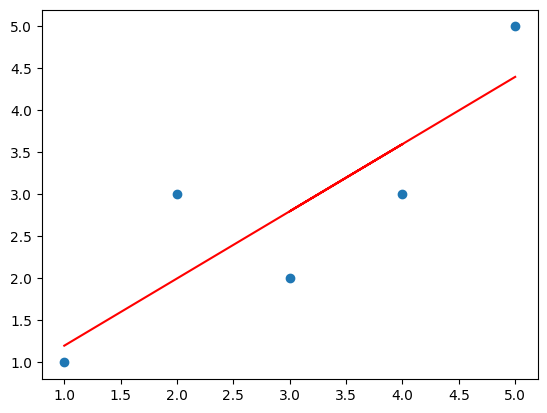

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.array([1, 2, 4, 3, 5])
Y = np.array([1, 3, 3, 2, 5])

# Implementing the least squares solution
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = sum((X - X_mean) * (Y - Y_mean))
den = sum((X - X_mean) ** 2)
slope = num / den
intercept = Y_mean - (slope * X_mean)

# Predict values
Y_pred = slope * X + intercept
print(f"Slope: {slope}, Intercept: {intercept}, Predicted Y: {Y_pred}")

# Plotting the data
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

## 2. **Binary Classification with Logistic Regression**
- **Objective:** Classify data into two categories (e.g., spam or not spam).
- **Overview:** Logistic regression is used for binary classification problems. Instead of fitting a line, logistic regression fits an "S"-shaped curve called the logistic function to the data, which outputs probabilities.
- **Steps:**
	1. Create or use an existing binary dataset (e.g., tumor classification as malignant or benign).
	2. Implement the logistic function and gradient descent to optimize the model.
	3. Evaluate the model using accuracy, precision, recall, and F1-score.

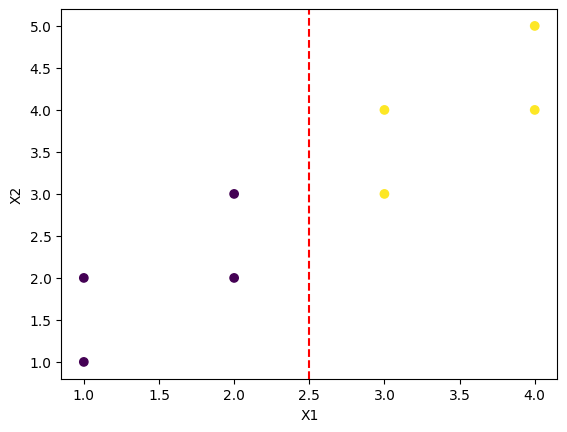

Weights: [0.66343677 0.01854757], Bias: -1.2240995115326971
Predicted Y: [0.36769568 0.37201839 0.5349104  0.53952157 0.69462965 0.69854968
 0.81814618 0.82088948]


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
	return 1 / (1 + np.exp(-z))

def logistic_regression(X, Y, lr=0.01, epochs=1000):
	m, n = X.shape
	weights = np.zeros(n)
	bias = 0
	for _ in range(epochs):
		linear_model = np.dot(X, weights) + bias
		y_pred = sigmoid(linear_model)
		dw = (1 / m) * np.dot(X.T, (y_pred - Y))
		db = (1 / m) * np.sum(y_pred - Y)
		weights -= lr * dw
		bias -= lr * db
	return weights, bias

# Example dataset (binary classification)
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [3, 3], [3, 4], [4, 4], [4, 5]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.axvline(x=2.5, color='red', linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Training the model
weights, bias = logistic_regression(X, Y)
print(f"Weights: {weights}, Bias: {bias}")

# Predicting the output
linear_model = np.dot(X, weights) + bias
Y_pred = sigmoid(linear_model)
print(f"Predicted Y: {Y_pred}")

## 3. **Decision Tree for Classification**
- **Objective:** Classify data using a tree structure.
- **Overview:** Decision trees are models that split data into branches based on feature values, leading to a decision (classification) at the leaf nodes. The tree is built using measures like Gini impurity or entropy to find the best splits.
- **Steps:**
	1. Construct a dataset with categorical features (e.g., predicting weather conditions).
	2. Implement the decision tree algorithm using recursive binary splitting.
	3. Evaluate the model using accuracy and visualize the tree structure.

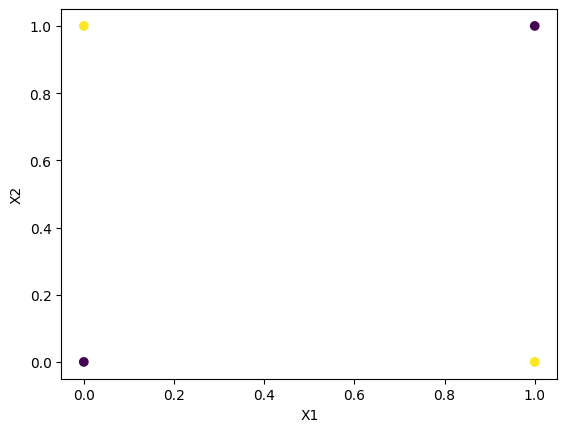

[0 1 1 0]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

class Node:
	def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
		self.feature = feature  # Index of the feature
		self.threshold = threshold  # Threshold for splitting
		self.left = left  # Left child node
		self.right = right  # Right child node
		self.value = value  # Value if leaf node

class DecisionTree:
	def __init__(self, max_depth=None):
		self.max_depth = max_depth

	def fit(self, X, y):
		self.root = self._build_tree(X, y)

	def predict(self, X):
		return np.array([self._predict(x) for x in X])

	def _build_tree(self, X, y, depth=0):
		num_samples, num_features = X.shape
		num_classes = len(np.unique(y))

		# Stopping criteria
		if (depth == self.max_depth) or (num_samples <= 1) or (num_classes == 1):
			leaf_value = self._most_common_label(y)
			return Node(value=leaf_value)

		best_feature, best_threshold = self._best_split(X, y)

		left_indices, right_indices = self._split(X[:, best_feature], best_threshold)
		left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
		right = self._build_tree(X[right_indices], y[right_indices], depth + 1)
		return Node(best_feature, best_threshold, left, right)

	def _best_split(self, X, y):
		# Implement logic to find the best feature and threshold based on information gain
		# This is a simplified example
		best_gain = -float('inf')
		best_feature, best_threshold = None, None
		for feature in range(X.shape[1]):
			thresholds = np.unique(X[:, feature])
			for threshold in thresholds:
				gain = self._information_gain(X, y, feature, threshold)
				if gain > best_gain:
					best_gain = gain
					best_feature = feature
					best_threshold = threshold
		return best_feature, best_threshold

	def _information_gain(self, X, y, feature, threshold):
		# Calculate information gain given a feature and threshold
		left_indices, right_indices = self._split(X[:, feature], threshold)
		if len(left_indices) == 0 or len(right_indices) == 0:
			return 0
		parent_entropy = self._entropy(y)
		left_entropy = self._entropy(y[left_indices])
		right_entropy = self._entropy(y[right_indices])
		child_entropy = (len(left_indices) / len(y)) * left_entropy + (len(right_indices) / len(y)) * right_entropy
		return parent_entropy - child_entropy

	def _split(self, feature_values, threshold):
		left_indices = np.where(feature_values <= threshold)[0]
		right_indices = np.where(feature_values > threshold)[0]
		return left_indices, right_indices

	def _most_common_label(self, y):
		return np.argmax(np.bincount(y))

	def _predict(self, x):
		node = self.root
		while node.value is None:
			if x[node.feature] <= node.threshold:
				node = node.left
			else:
				node = node.right
		return node.value

	def _entropy(self, y):
		# Implement logic to calculate entropy
		# This is a simplified example
		counts = np.bincount(y)
		probs = counts / len(y)
		return -np.sum([p * np.log2(p) for p in probs if p > 0])


# Example dataset (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Train the model
model = DecisionTree()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)
print(predictions)

## 4. **K-Nearest Neighbors (KNN)**
- **Objective:** Classify data based on the majority class of the nearest neighbors.
- **Overview:** KNN is a simple, non-parametric algorithm that classifies data points based on the classes of their nearest neighbors. It's a lazy learning algorithm, meaning it makes decisions at prediction time.
- **Steps:**
	1. Prepare a small dataset with labeled data points.
	2. Implement the KNN algorithm by calculating Euclidean distance between points.
	3. Evaluate the model using cross-validation.

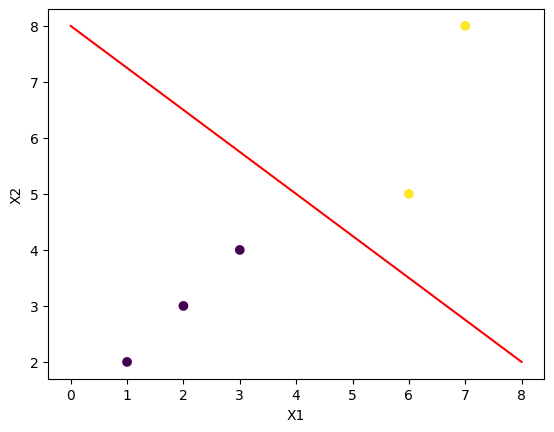

Predictions: [0, 1, 0]


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(x1, x2):
	return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(X_train, Y_train, X_test, k=3):
	predictions = []
	for test_point in X_test:
		distances = [euclidean_distance(test_point, x) for x in X_train]
		k_indices = np.argsort(distances)[:k]
		k_nearest_labels = [Y_train[i] for i in k_indices]
		most_common = Counter(k_nearest_labels).most_common(1)
		predictions.append(most_common[0][0])
	return predictions

# Example usage (binary classification problem)
X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 5], [7, 8]])
Y_train = np.array([0, 0, 0, 1, 1])

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
x = np.linspace(0, 8, 100)
y = -.75 * x + 8
plt.plot(x, y, '-r', label='y=-.75x+8')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Make predictions
X_test = np.array([[2, 2], [5, 6], [1, 3]])

predictions = knn(X_train, Y_train, X_test, k=3)
print(f"Predictions: {predictions}")

## 5. **K-Means Clustering**
- **Objective:** Group similar data points into clusters.
- **Overview:** K-Means is an unsupervised learning algorithm that partitions a dataset into K clusters. The goal is to minimize the variance within each cluster.
- **Steps:**
	1. Prepare a dataset with multiple features.
	2. Implement the K-means algorithm by randomly initializing centroids and iteratively updating them.
	3. Evaluate the clustering using metrics like silhouette score or intra-cluster variance.

Centroids: [[ 9.66666667 11.        ]
 [ 2.75        4.25      ]]


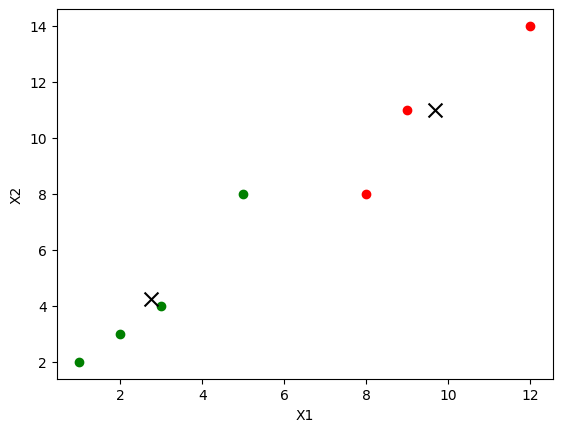

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, k, max_iters=100):
	m, n = X.shape
	centroids = X[np.random.choice(m, k, replace=False)]
	for _ in range(max_iters):
		clusters = [[] for _ in range(k)]
		for point in X:
			distances = [np.linalg.norm(point - c) for c in centroids]
			cluster = np.argmin(distances)
			clusters[cluster].append(point)
		centroids = [np.mean(cluster, axis=0) for cluster in clusters]
	return np.array(centroids), clusters

# Example usage (2 clusters) - 2D data
X = np.array([[1, 2], [2, 3], [3, 4], [5, 8], [8, 8], [9, 11], [12, 14]])

# Set PRNG seed for reproducibility
np.random.seed(1)

# Train the model
centroids, clusters = k_means(X, k=2)
print(f"Centroids: {centroids}")

# Plotting the data
colors = ['r', 'g']
for cluster, color in zip(clusters, colors):
	cluster = np.array(cluster)
	plt.scatter(cluster[:, 0], cluster[:, 1], c=color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 6. **Naive Bayes Classifier**
- **Objective:** Classify data using Bayes' Theorem with the assumption of feature independence.
- **Overview:** Naive Bayes is a probabilistic classifier that applies Bayes' Theorem. It assumes that the presence of a feature in a class is independent of the presence of any other feature.
- **Steps:**
	1. Collect or use a small categorical dataset.
	2. Implement the Naive Bayes algorithm by calculating prior probabilities and likelihoods.
	3. Evaluate the model using a confusion matrix and ROC curve.

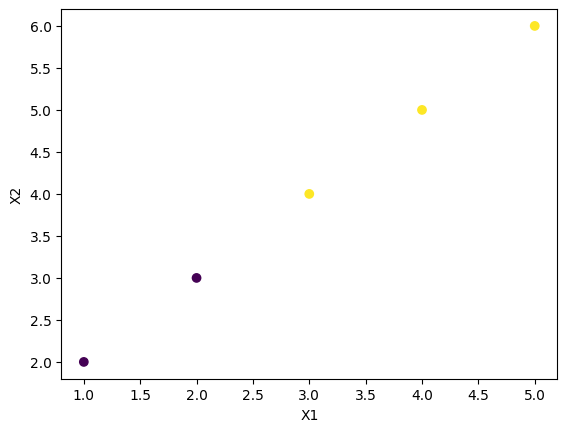

Predictions: [0 0 1 1 1]


In [82]:
import numpy as np
import matplotlib.pyplot as plt

class NaiveBayes:
	def fit(self, X, Y):
		n_samples, n_features = X.shape
		self._classes = np.unique(Y)
		self._mean = np.zeros((len(self._classes), n_features), dtype=np.float64)
		self._var = np.zeros((len(self._classes), n_features), dtype=np.float64)
		self._priors = np.zeros(len(self._classes), dtype=np.float64)

		for idx, c in enumerate(self._classes):
			X_c = X[Y == c]
			self._mean[idx, :] = X_c.mean(axis=0)
			self._var[idx, :] = X_c.var(axis=0)
			self._priors[idx] = X_c.shape[0] / float(n_samples)

	def predict(self, X):
		y_pred = [self._predict(x) for x in X]
		return np.array(y_pred)

	def _predict(self, x):
		posteriors = []
		for idx, c in enumerate(self._classes):
			prior = np.log(self._priors[idx])
			posterior = np.sum(np.log(self._pdf(idx, x)))
			posterior = prior + posterior
			posteriors.append(posterior)
		return self._classes[np.argmax(posteriors)]

	def _pdf(self, class_idx, x):
		mean = self._mean[class_idx]
		var = self._var[class_idx]
		numerator = np.exp(- (x - mean) ** 2 / (2 * var))
		denominator = np.sqrt(2 * np.pi * var)
		return numerator / denominator

# Example usage (binary classification)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
Y = np.array([0, 0, 1, 1, 1])

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Train the model
nb = NaiveBayes()
nb.fit(X, Y)

# Make predictions
predictions = nb.predict(X)
print(f"Predictions: {predictions}")

## 7. **Simple Neural Network**
- **Objective:** Implement a basic neural network for a classification task.
- **Overview:** A neural network is composed of layers of interconnected nodes, where each node represents a neuron. The network learns to map inputs to outputs through backpropagation.
- **Steps:**
	1. Create a dataset that is linearly inseparable (e.g., XOR problem).
	2. Implement a feedforward neural network with one hidden layer.
	3. Use backpropagation and gradient descent to train the network.

In [125]:
import numpy as np

def sigmoid(x):
	return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
	return x * (1 - x)

class NeuralNetwork:
	def __init__(self, x, y):
		self.input = x
		self.weights1 = np.random.rand(self.input.shape[1], 4)
		self.weights2 = np.random.rand(4, 1)
		self.y = y
		self.output = np.zeros(y.shape)

	def feedforward(self):
		self.layer1 = sigmoid(np.dot(self.input, self.weights1))
		self.output = sigmoid(np.dot(self.layer1, self.weights2))

	def backprop(self):
		d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
		d_weights1 = np.dot(self.input.T,  (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

		self.weights1 += d_weights1
		self.weights2 += d_weights2

# Example usage (XOR problem)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

# Set PRNG seed for reproducibility
np.random.seed(1)

# Set parameters
epochs = 1000

# Train the model
nn = NeuralNetwork(X, Y)
for i in range(epochs):
	nn.feedforward()
	nn.backprop()

# Print output after training
print(f"Output after training:\n{nn.output}")

# Make predictions (constraint: binary classification)
predictions = np.round(nn.output)
print(f"\nPredictions:\n{predictions}")

Output after training:
[[0.06588733]
 [0.94481486]
 [0.94467121]
 [0.04844339]]

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


## 8. **Simple Recommender System**
- **Objective:** Recommend items based on user preferences.
- **Overview:** Recommender systems predict user preferences based on past behavior. A simple approach is collaborative filtering, which recommends items based on user similarity or item similarity.
- **Steps:**
	1. Prepare a small user-item matrix (e.g., movie ratings).
	2. Implement collaborative filtering using cosine similarity.
	3. Evaluate the system using precision and recall.

User Vector:
[1 0 1]

Top Recommendations (item_index, similarity_score):
(1, 0.8164965809277259)
(3, 0.8164965809277259)
(2, 0.7071067811865475)


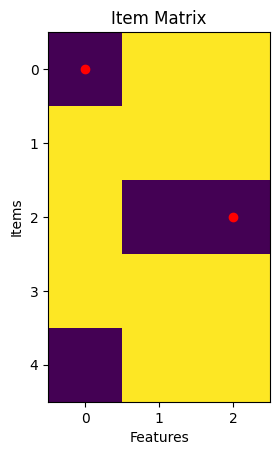

In [187]:
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(vector_a, vector_b):
	dot_product = np.dot(vector_a, vector_b)
	norm_a = np.linalg.norm(vector_a)
	norm_b = np.linalg.norm(vector_b)

	if norm_a == 0 or norm_b == 0:
		return 0.0

	return dot_product / (norm_a * norm_b)

def recommend(user_vector, item_matrix, top_n=5):
	similarities = []

	for idx, item_vector in enumerate(item_matrix):
		similarity = cosine_similarity(user_vector, item_vector)
		similarities.append((idx, similarity))

	# Sort items based on similarity score in descending order
	similarities.sort(key=lambda x: x[1], reverse=True)

	return similarities[:top_n]

# Example user vector and item matrix
user_vector = np.random.randint(2, size=3)
item_matrix = np.random.randint(2, size=(5, 3))

# Print user vector
print("User Vector:")
print(user_vector, end = "\n\n")

# Get top 3 recommendations
top_recommendations = recommend(user_vector, item_matrix, top_n=3)

print("Top Recommendations (item_index, similarity_score):")
for item in top_recommendations:
	print(item)

# Plotting the user vector and item matrix
plt.imshow(item_matrix, interpolation='nearest')
plt.title('Item Matrix')
plt.xlabel('Features')
plt.ylabel('Items')
plt.scatter([0, 2], [0, 2], marker='o', color='red')
plt.show()

## 9. **Support Vector Machine (SVM)**
- **Objective:** Classify data by finding the optimal separating hyperplane.
- **Overview:** SVMs are powerful supervised learning models that classify data by finding the hyperplane that maximizes the margin between different classes. For non-linear data, SVM can use kernel tricks to map data to higher dimensions.
- **Steps:**
	1. Prepare a binary classification dataset.
	2. Implement the SVM algorithm using the hinge loss function and gradient descent.
	3. Evaluate the model using accuracy and plot the decision boundary.

## 10. **Genetic Algorithm**
- **Objective:** Solve optimization problems using the principles of natural selection.
- **Overview:** Genetic algorithms (GA) are heuristic search algorithms inspired by the process of natural evolution. GAs use operations such as mutation, crossover, and selection to evolve solutions to optimization problems.
- **Steps:**
	1. Define a fitness function for an optimization problem (e.g., maximizing a mathematical function).
	2. Implement GA with a population of solutions.
	3. Evaluate and visualize the evolution of the solution over generations.